# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
#make data
x_1 = np.linspace(start = -3, stop = 3, num = 500)
# x_1 = np.linspace(-3,3,10)//this can be written in this way too
# x_1

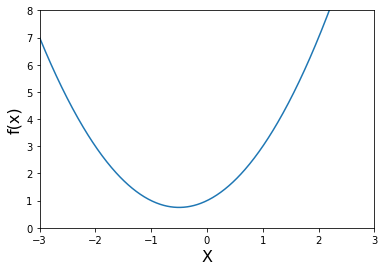

In [8]:
#plot
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivative
Challenge : Create a python function for the derivative of $f(x)$ called $df(x)$

In [10]:
def df(x):
    return 2*x + 1

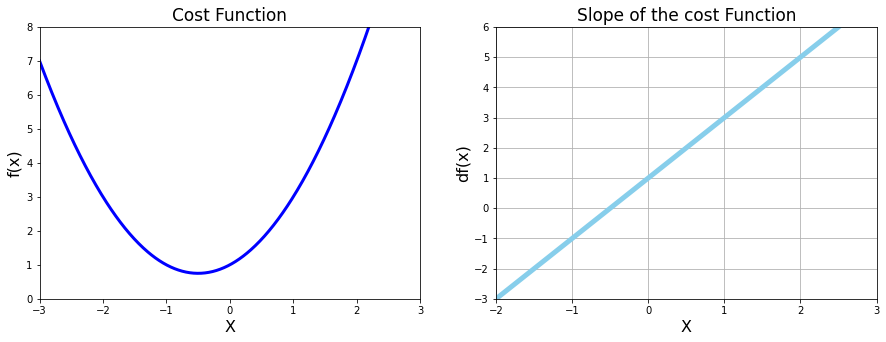

In [29]:
#plot function and derivative side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1, f(x_1), color='blue', linewidth = 3)

#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.title('Slope of the cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('df(x)', fontsize = 16)
plt.plot(x_1,df(x_1),color='skyblue', linewidth = 5)

plt.show()